In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import warnings 
warnings.filterwarnings("ignore")

# Import postgres username and password.
from password import (username, password)

In [2]:
# Import and access the SQL database (Source: UTSA assignment module 9 supplied code).
from sqlalchemy import create_engine
engine = create_engine('postgresql://' + username + ':' + password + '@localhost:5432/EmployeesSQL_db')
connection = engine.connect()

In [3]:
# Read SQL query results using pandas (source: https://towardsdatascience.com/how-to-convert-sql-query-results-to-a-pandas-dataframe-a50f0d920384).
salary_df = pd.read_sql("""
            SELECT *
            FROM salaries
            """, con = engine)

# Return first 10 rows.
salary_df.head(10)

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
5,10006,40000
6,10007,56724
7,10008,46671
8,10009,60929
9,10010,72488


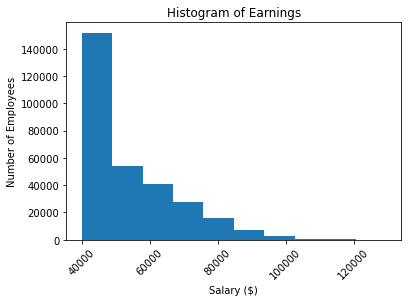

In [16]:
# Create histogram of employee salary ranges.
x = salary_df["salary"]

plt.hist(x)
plt.title("Histogram of Earnings")
plt.xlabel("Salary ($)")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

# Histogram Analysis
----------------------------------------
The histogram does appear to conform to expectations for the employee salary at a corporation, where there are higher numbers of employees making lower salaries and progressively fewer making higher salaries.  Typically, this is the sort of trend we would expect to see, as salaries increase with years of experience, position, and levels of responsibility.

In [5]:
# Read SQL query results using pandas (source: https://towardsdatascience.com/how-to-convert-sql-query-results-to-a-pandas-dataframe-a50f0d920384).
titles_df = pd.read_sql("""
            SELECT *
            FROM titles
            """, con = engine)

# Return first 10 rows.
titles_df.head(10)

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [6]:
# Read SQL query results using pandas (source: https://towardsdatascience.com/how-to-convert-sql-query-results-to-a-pandas-dataframe-a50f0d920384).
employees_df = pd.read_sql("""
            SELECT *
            FROM employees
            """, con = engine)

# Return first 10 rows.
employees_df.head(10)

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
5,263976,e0003,10/30/1959,Eran,Cusworth,M,11/14/1986
6,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991
7,461591,s0002,11/17/1964,Xudong,Samarati,M,11/13/1985
8,477657,e0002,12/18/1962,Lihong,Magliocco,M,10/23/1993
9,219881,s0002,4/24/1956,Kwangyoen,Speek,F,2/14/1993


In [7]:
# Rename titles_df column to match employees_df column.
titles_df = titles_df.rename(columns={"title_id": "emp_title"})
titles_df

,emp_title,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [8]:
# Merge salary_df into employees_df.
employ_df = pd.merge(employees_df, salary_df, on = "emp_no", how = "left")
employ_df.head(10)

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000
5,263976,e0003,10/30/1959,Eran,Cusworth,M,11/14/1986,40000
6,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087
7,461591,s0002,11/17/1964,Xudong,Samarati,M,11/13/1985,40000
8,477657,e0002,12/18/1962,Lihong,Magliocco,M,10/23/1993,54816
9,219881,s0002,4/24/1956,Kwangyoen,Speek,F,2/14/1993,40000


In [9]:
# Merge titles_df into employee_titles_df.
employee_titles_df = pd.merge(employ_df, titles_df, on = "emp_title", how = "left")
employee_titles_df.head(10)

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422,Engineer
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973,Engineer
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000,Senior Engineer
5,263976,e0003,10/30/1959,Eran,Cusworth,M,11/14/1986,40000,Senior Engineer
6,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,Staff
7,461591,s0002,11/17/1964,Xudong,Samarati,M,11/13/1985,40000,Senior Staff
8,477657,e0002,12/18/1962,Lihong,Magliocco,M,10/23/1993,54816,Engineer
9,219881,s0002,4/24/1956,Kwangyoen,Speek,F,2/14/1993,40000,Senior Staff


In [10]:
# Calculate average salary for each job title.
mean_s0001 = employee_titles_df.loc[employee_titles_df['emp_title'] == 's0001', 'salary'].mean()
mean_s0002 = employee_titles_df.loc[employee_titles_df['emp_title'] == 's0002', 'salary'].mean()
mean_e0001 = employee_titles_df.loc[employee_titles_df['emp_title'] == 'e0001', 'salary'].mean()
mean_e0002 = employee_titles_df.loc[employee_titles_df['emp_title'] == 'e0002', 'salary'].mean()
mean_e0003 = employee_titles_df.loc[employee_titles_df['emp_title'] == 'e0003', 'salary'].mean()
mean_e0004 = employee_titles_df.loc[employee_titles_df['emp_title'] == 'e0004', 'salary'].mean()
mean_m0001 = employee_titles_df.loc[employee_titles_df['emp_title'] == 'm0001', 'salary'].mean()

In [11]:
# Create dataframe with average salaries by job title.
mean_salary_data = [mean_s0001, mean_s0002, mean_e0001, mean_e0002, mean_e0003, mean_e0004, mean_m0001]
emp_title = ['Staff', 'Senior Staff', 'Assistant Engineer', 'Engineer', 'Senior Engineer', 'Technique Leader', 'Manager']
mean_salary_df = pd.DataFrame(emp_title, columns = ['title'])
mean_salary_df

,title
0,Staff
1,Senior Staff
2,Assistant Engineer
3,Engineer
4,Senior Engineer
5,Technique Leader
6,Manager


In [12]:
# Add mean_salary_data to the mean_salary_df.
mean_salary_df['mean_salary'] = mean_salary_data
mean_salary_df = mean_salary_df.round(2)
mean_salary_df

,title,mean_salary
0,Staff,58465.38
1,Senior Staff,58550.17
2,Assistant Engineer,48564.43
3,Engineer,48535.34
4,Senior Engineer,48506.80
5,Technique Leader,48582.90
6,Manager,51531.04


In [13]:
# Merge mean_salary_df into employee_titles_df.
employee_final_df = pd.merge(employee_titles_df, mean_salary_df, on = "title", how = "left")
employee_final_df.head(10)

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,salary,title,mean_salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff,58465.38
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422,Engineer,48535.34
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973,Engineer,48535.34
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff,58465.38
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000,Senior Engineer,48506.80
5,263976,e0003,10/30/1959,Eran,Cusworth,M,11/14/1986,40000,Senior Engineer,48506.80
6,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,Staff,58465.38
7,461591,s0002,11/17/1964,Xudong,Samarati,M,11/13/1985,40000,Senior Staff,58550.17
8,477657,e0002,12/18/1962,Lihong,Magliocco,M,10/23/1993,54816,Engineer,48535.34
9,219881,s0002,4/24/1956,Kwangyoen,Speek,F,2/14/1993,40000,Senior Staff,58550.17


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Staff'),
  Text(1, 0, 'Senior Staff'),
  Text(2, 0, 'Assistant Engineer'),
  Text(3, 0, 'Engineer'),
  Text(4, 0, 'Senior Engineer'),
  Text(5, 0, 'Technique Leader'),
  Text(6, 0, 'Manager')])

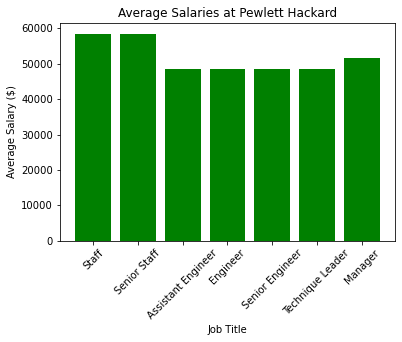

In [17]:
# Create a bar chart of average salary by title.
title = mean_salary_df['title']
mean_salary = mean_salary_df['mean_salary']
x_axis = np.arange(len(title))

plt.bar(title, mean_salary, color="g", align="center")

plt.title("Average Salaries at Pewlett Hackard")
plt.xlabel("Job Title")
plt.ylabel("Average Salary ($)")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, title)
plt.xticks(rotation=45)

# Bar Chart Analysis
----------------------------------------
The bar chart shows visually that here is very little diference in average pay between the two levels of "staff" employees, or between the four levels of "engineer" employees.

In fact, senior engineers are listed as earning less than assistant engineers or engineers and technique leaders earn barely more than any of the other levels of engineers.

Additionally, "managers" earn more than all of the "engineers," but less than even the lowest "staff" pay grade.

# Conclusion
----------------------------------------
While the histogram analysis does indicate that the general trend of salaries may be appropriate, the bar chart analysis reveals that the salary data apppear to be erroneus.